In [2]:
import pandas as pd
import dppd, dppd_plotnine
dp, X = dppd.dppd()

In [9]:
# from https://repology.org/repositories/statistics 20240823
df = pd.read_html("Raw repository package counts - Repology.html")
df  = df[0]
df.columns = [x[1] for x in df.columns]

In [10]:
df.sort_values('Total').tail(50)

,Repository,Total,New.,Dev.,Unq.,Out.,Leg.,Rol.,Nov.,Inc.,Unt.,Ign.,Vul.
279,Rosa 2014.1,27910,6717,48,1584,12786,3504,0,75,80,3116,0,1672
122,Fedora 34,28090,7728,43,1816,13788,4203,0,100,50,4,358,1381
267,PureOS amber,28585,6748,59,3596,17324,122,0,125,134,54,423,1126
95,Devuan 3.0,28837,6780,60,3681,17462,108,0,131,134,54,427,1115
128,Fedora 40,29006,14827,82,2318,7389,3843,0,112,71,1,363,571
123,Fedora 35,29125,8205,49,2077,13664,4550,0,107,51,5,417,1294
127,Fedora 39,29336,12934,78,2251,9092,4469,0,101,68,2,341,753
132,Gentoo,29431,10980,198,2688,3567,8249,1755,161,140,1388,305,759
124,Fedora 36,29727,8784,54,2295,13367,4644,0,114,57,4,408,1199
125,Fedora 37,29763,9649,57,2452,12376,4673,0,109,61,3,383,1045


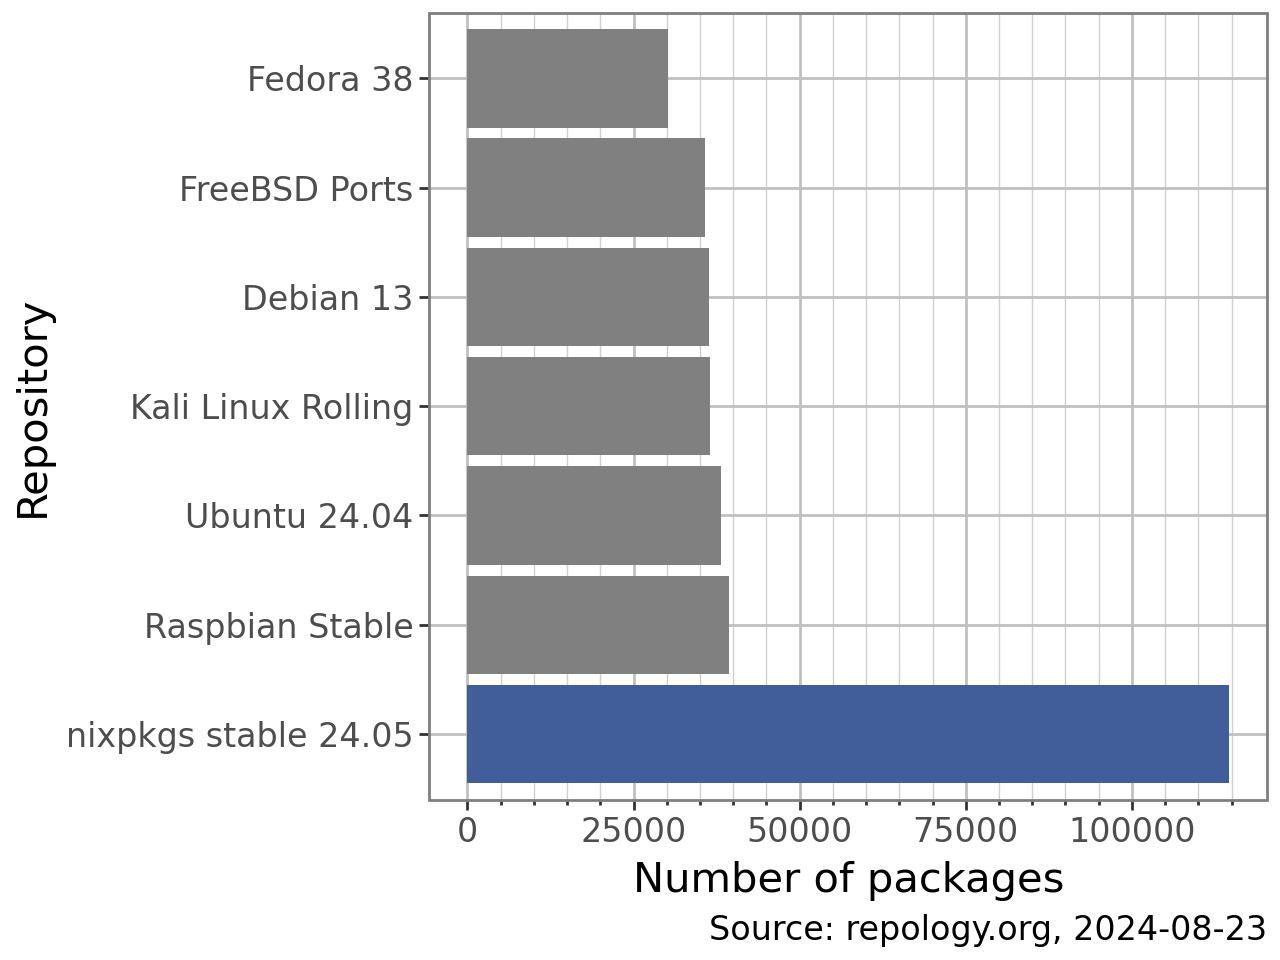

In [32]:
p  = (dp(df)
 .sort_values('Total', ascending=False)
 .filter_by(X['Repository'].str.lower().str.contains('nixpkgs stable 24.05|ubuntu 24.04$|raspbian stable|debian 13|kali linux rolling|freebsd ports|^fedora 38$'))
 #.sort_values('Total')
 .categorize('Repository')
 .assign(is_nixpkgs=X.Repository.str.lower().str.contains("nixpkgs").astype(str))

 .p9()
 .theme_bw(base_size=15)
 .theme(
    panel_grid = p9.element_line(color='#C0C0C0'),
    panel_grid_minor = p9.element_line(color='#D0D0D0'),
    axis_ticks=p9.element_line(),        # turn on major & minor breaks
    axis_ticks_minor=p9.element_line() ,  # turn on minor breaks
    axis_ticks_minor_x=p9.element_line(), # turn on minor breaks for the x axis
    axis_ticks_minor_y=p9.element_line() ,# turn on minor breaks for the y axis
    )
 
     .scale_fill_manual(['grey', '#415e9aff'], guide=None)
     .add_bar('Repository', 'Total', fill='is_nixpkgs').coord_flip()
     .syc(name="Number of packages",
     breaks = list(range(0, 120000,25000)),
      minor_breaks = list(range(0, 120_000,5000))
     )
     ).pd
import plotnine as p9
p += p9.labs(caption="Source: repology.org, 2024-08-23")
 

(dp(p)
 .render("repo_sizes.svg")

 #.hide_legend()
).pd

In [46]:
data = """nixpkgs stable 21.11 	80214 	29909 	88 	6098 	37166 	2254 	0 	390 	342 	3832 	135 	1724
nixpkgs stable 22.05 	85999 	33378 	96 	6827 	38310 	2416 	0 	405 	380 	4020 	167 	1679
nixpkgs stable 22.11 	95572 	36892 	102 	11523 	39032 	2790 	0 	421 	371 	4210 	231 	1524
nixpkgs stable 23.05 	99994 	41284 	111 	12520 	37655 	2755 	0 	449 	407 	4563 	250 	1214
nixpkgs stable 23.11 	107004 	49501 	126 	14204 	34176 	3020 	0 	471 	453 	4773 	280 	849
nixpkgs stable 24.05 	114630 	63583 	165 	15060 	26621 	3047 	0 	436 	385 	4715 	618 	579
nixpkgs unstable 	117659 	75283
"""
lines = [x.split("\t") for x in data.strip().split("\n")]
pdfnixpkgs = pd.DataFrame({
    'ver': [x[0].replace("nixpkgs",'').replace(' stable ', '').strip() for x in lines],
    'count': [int(x[1]) for x in lines],
})
pdfnixpkgs

,ver,count
0,21.11,80214
1,22.05,85999
2,22.11,95572
3,23.05,99994
4,23.11,107004
5,24.05,114630
6,unstable,117659


In [44]:
data = """Ubuntu 18.04 Backports 	18 	0 	0 	1 	17 	0 	0 	0 	0 	0 	0 	4
Ubuntu 20.04 	32633 	7638 	64 	4318 	18874 	852 	0 	151 	168 	53 	515 	1489
Ubuntu 20.04 Backports 	21 	1 	0 	0 	20 	0 	0 	0 	0 	0 	0 	1
Ubuntu 22.04 	35869 	9924 	71 	5460 	18270 	807 	0 	176 	458 	56 	647 	1082
Ubuntu 22.04 Backports 	20 	4 	0 	1 	15 	0 	0 	0 	0 	0 	0 	0
Ubuntu 23.04 	36507 	11979 	81 	6022 	16615 	315 	0 	174 	549 	60 	712 	743
Ubuntu 23.04 Backports 	3 	0 	0 	0 	3 	0 	0 	0 	0 	0 	0 	0
Ubuntu 23.10 	37309 	12930 	85 	6375 	16057 	293 	0 	173 	601 	59 	736 	672
Ubuntu 23.10 Backports 	3 	0 	0 	0 	3 	0 	0 	0 	0 	0 	0 	0
Ubuntu 24.04 	38231 	15460 	99 	7538 	12994 	511 	0 	168 	631 	59 	771 	446
Ubuntu 24.04 Backports 	9 	2 	0 	0 	7 	0 	0 	0 	0 	0 	0 	0
Ubuntu 24.10 	38506"""
lines = [x.split("\t") for x in data.strip().split("\n") if not 'Backports' in x]
pdfubuntu = pd.DataFrame({
    'ver': [x[0].replace("Ubuntu",'').replace(' stable ', '').strip() for x in lines],
    'count': [int(x[1]) for x in lines],
})
pdfubuntu

,ver,count
0,20.04,32633
1,22.04,35869
2,23.04,36507
3,23.10,37309
4,24.04,38231
5,24.10,38506


In [50]:
import datetime
def datify(ver):
    if ver == 'unstable':
        return datetime.date(2024,11,1)
    year, month = ver.split(".")
    return datetime.date(int('20' + year), int(month), 1)
pdf = pd.concat([pdfnixpkgs.assign(repo='nixpkgs'),
pdfubuntu.assign(repo='ubuntu')])
pdf = pdf.assign(date = [datify(x) for x in pdf.ver])
pdf

,ver,count,repo,date
0,21.11,80214,nixpkgs,2021-11-01
1,22.05,85999,nixpkgs,2022-05-01
2,22.11,95572,nixpkgs,2022-11-01
3,23.05,99994,nixpkgs,2023-05-01
4,23.11,107004,nixpkgs,2023-11-01
5,24.05,114630,nixpkgs,2024-05-01
6,unstable,117659,nixpkgs,2024-11-01
0,20.04,32633,ubuntu,2020-04-01
1,22.04,35869,ubuntu,2022-04-01
2,23.04,36507,ubuntu,2023-04-01


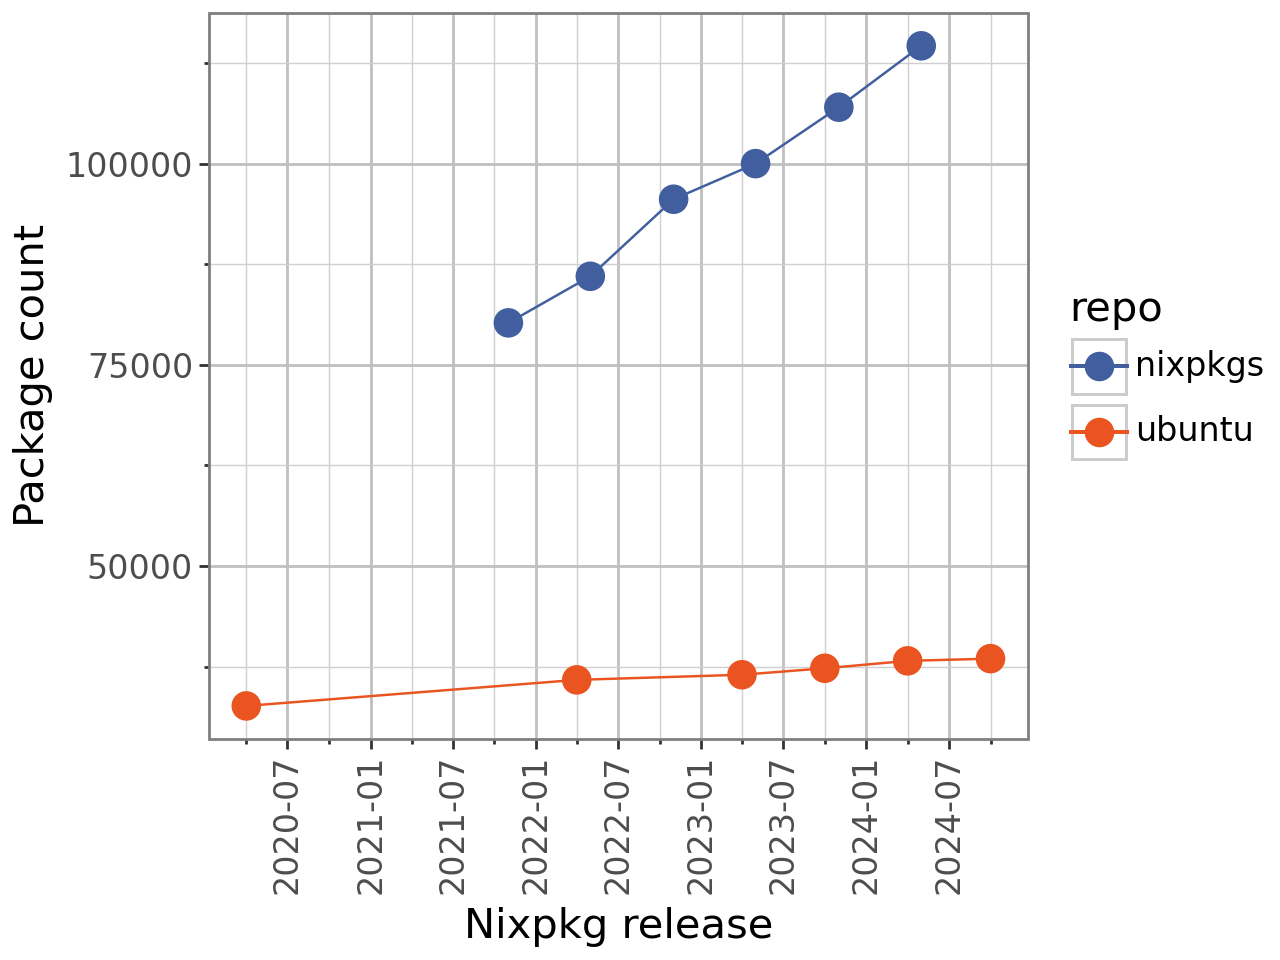

In [68]:
(dp(pdf)
 .filter_by(X.ver != 'unstable')
.p9()
 .theme_bw(base_size=15)
 .theme(
    panel_grid = p9.element_line(color='#C0C0C0'),
    panel_grid_minor = p9.element_line(color='#D0D0D0'),
    axis_ticks=p9.element_line(),        # turn on major & minor breaks
    axis_ticks_minor=p9.element_line() ,  # turn on minor breaks
    axis_ticks_minor_x=p9.element_line(), # turn on minor breaks for the x axis
    axis_ticks_minor_y=p9.element_line() ,# turn on minor breaks for the y axis
    )
.add_scatter('date','count', color='repo', _size=5)
.add_line('date','count', group='repo', color='repo')
 .syc(name="Package count")
 .scale_x_datetime(name='Nixpkg release',
               date_breaks="6 months",
                   labels = lambda x: [y.strftime("%Y-%m") for y in x]
                         )
 .turn_x_axis_labels()
 .scale_color_manual(['#415e9f', '#E95420'])
 .render("nixpkgs vs ubuntu growth rate.svg")
.pd)